<a href="https://colab.research.google.com/github/ananyagoel18/Data-analysis/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch torchvision scikit-learn numpy matplotlib


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 102555547.39it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 48357562.40it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 56052677.02it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8176192.60it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
batch_size = 64

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


In [5]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [6]:
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [7]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/5], Loss: 0.3953
Epoch [2/5], Loss: 0.1850
Epoch [3/5], Loss: 0.1316
Epoch [4/5], Loss: 0.1070
Epoch [5/5], Loss: 0.0905


In [8]:
y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("Classification Report:")
print(classification_report(y_true, y_pred))


Test Accuracy: 0.9704
Confusion Matrix:
[[ 962    0    0    1    1    2    7    2    1    4]
 [   0 1121    2    1    0    2    4    3    2    0]
 [   9    1 1000    3    2    1    4    7    5    0]
 [   0    1    3  962    0   20    0   11    3   10]
 [   0    0    3    0  964    0    5    1    0    9]
 [   3    0    0    1    4  871    7    1    2    3]
 [   5    3    0    0    6    4  938    1    1    0]
 [   0    2   12    0    0    0    1 1000    0   13]
 [   5    0    6    6    6   13    8    8  910   12]
 [   2    2    0    5   14    2    0    8    0  976]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.95      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.95      0.98      0.96       892
           6       0.96    

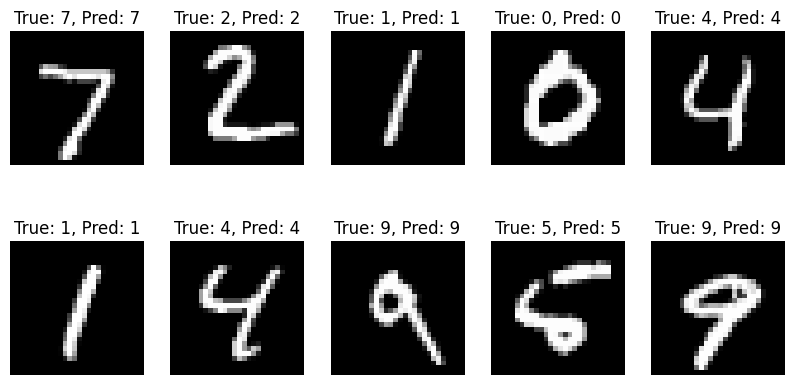

In [10]:
def plot_samples(images, labels, predictions, n=10):
    plt.figure(figsize=(10, 5))
    for i in range(n):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"True: {labels[i]}, Pred: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Visualize some samples
sample_images, sample_labels = next(iter(test_loader))
sample_outputs = model(sample_images)
_, sample_preds = torch.max(sample_outputs, 1)
plot_samples(sample_images, sample_labels, sample_preds)


In [11]:
torch.save(model.state_dict(), "mnist_model.pth")


In [12]:
model = NeuralNet()
model.load_state_dict(torch.load("mnist_model.pth"))


<ipython-input-12-1273557e2b00>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mnist_model.pth"))


<All keys matched successfully>